In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('data/data_market.csv', encoding='latin1')

In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
for x_column in dataset :
    x_sales = dataset['Sales']
    x_profit = dataset['Profit']
    
    dataset['profit_margin'] = x_profit/x_sales
    
x_avg = dataset['profit_margin'].mean()

print(x_avg)

0.25022813688212764


In [6]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39


In [7]:
for index, row in dataset.iterrows():
    if row['profit_margin'] > x_avg:
        dataset.at[index, 'If_Profit'] = 'Profit'
    else :
        dataset.at[index, 'If_Profit'] = 'Not Profit'
        
        
dataset.head()
    

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,If_Profit
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Not Profit
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Not Profit
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Not Profit
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,Profit


In [8]:
dataset = pd.DataFrame(dataset)

In [9]:
dataset['If_Profit'].unique()

array(['Profit', 'Not Profit'], dtype=object)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  If_Profit      9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [11]:
#To find number of rows and column
dataset.shape

(9994, 13)

<AxesSubplot:xlabel='If_Profit', ylabel='Count'>

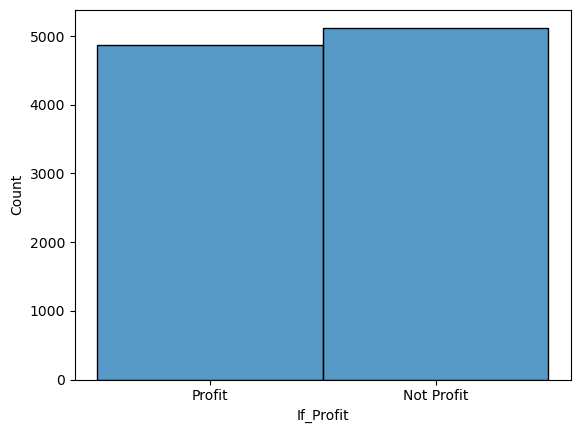

In [12]:
sns.histplot(dataset['If_Profit'])

In [13]:
# dataset.to_csv('data/CleanData.csv', index=False)

In [14]:
X = dataset.drop(['If_Profit','Sales','profit_margin','Profit'],axis=1)
# X = dataset['Sub Category']
y = dataset['If_Profit']

In [15]:
X = pd.get_dummies(X)
X.head()

,Discount,Order ID_OD1,Order ID_OD10,Order ID_OD100,Order ID_OD1000,Order ID_OD1001,Order ID_OD1002,Order ID_OD1003,Order ID_OD1004,Order ID_OD1005,...,Order Date_9/29/2018,Order Date_9/30/2015,Order Date_9/30/2017,Order Date_9/30/2018,Region_Central,Region_East,Region_North,Region_South,Region_West,State_Tamil Nadu
0,0.12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 1 1 0]


# ***Splitting data train & test***

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
X_train.shape , X_test.shape

((7995, 11341), (1999, 11341))

In [19]:
y_train.shape , y_test.shape

((7995,), (1999,))

# ***Decision Tree*** *with gini index*

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV

In [21]:
from sklearn.metrics import accuracy_score

[Text(0.6666666666666666, 0.875, 'X[11284] <= 0.5\ngini = 0.5\nsamples = 7995\nvalue = [4100, 3895]'),
 Text(0.5, 0.625, 'X[10635] <= 0.5\ngini = 0.5\nsamples = 7984\nvalue = [4089, 3895]'),
 Text(0.3333333333333333, 0.375, 'X[11261] <= 0.5\ngini = 0.5\nsamples = 7975\nvalue = [4089, 3886]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.5\nsamples = 7967\nvalue = [4089, 3878]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

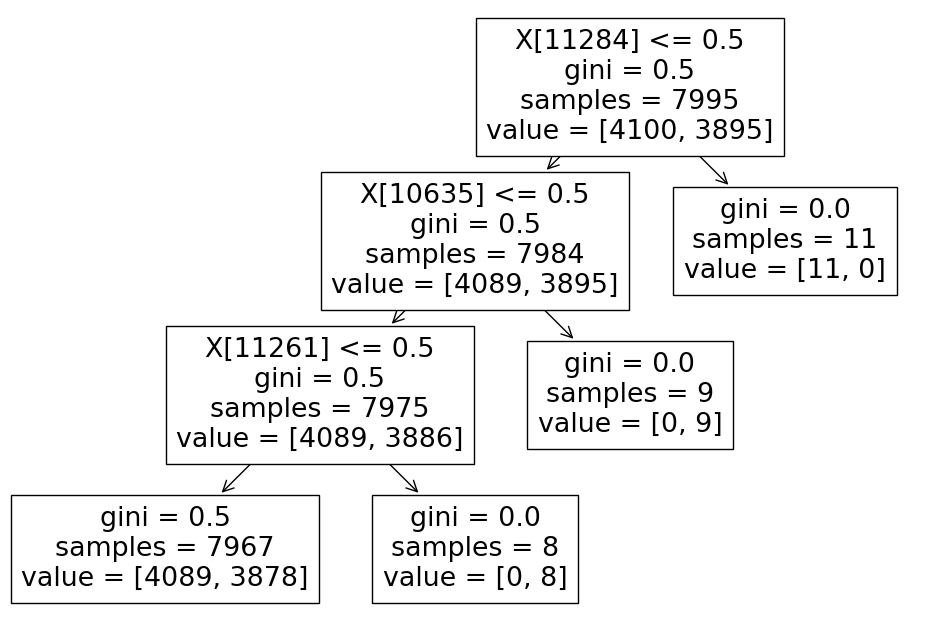

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

# clf_gini = GridSearchCV(estimator=df, param_grid=param_grid, cv=5, scoring='accuracy')
# clf_gini.fit(X_train, y_train)
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [23]:
clf = DecisionTreeClassifier(random_state=42)
params = { 
    "max_depth": range(5,41,5), 
    "criterion": ["gini", "entropy"]
}

In [24]:
model_dt =  GridSearchCV(estimator=clf, #
    param_grid=params,
    cv=2, 
    n_jobs=-1,
    verbose=1
)

In [25]:
model_dt.fit(X_train, y_train) # model fit

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 41, 5)},
             verbose=1)

In [26]:
cv_results_dt = pd.DataFrame(model_dt.cv_results_)
cv_results_dt.sort_values("rank_test_score").head(1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
9,7.073837,4.008164,0.767592,0.209159,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.514257,0.513885,0.514071,0.000186,1


In [27]:
best_params = model_dt.best_params_
best_maxDepth = best_params['max_depth']
best_Criterion = best_params['criterion']

print(f'The best Max Depth : {best_maxDepth}')
print(f'The best Criterion : {best_Criterion}')

The best Max Depth : 10
The best Criterion : entropy


[Text(0.8666666666666667, 0.9545454545454546, 'X[11284] <= 0.5\nentropy = 1.0\nsamples = 7995\nvalue = [4100, 3895]'),
 Text(0.8, 0.8636363636363636, 'X[10635] <= 0.5\nentropy = 1.0\nsamples = 7984\nvalue = [4089, 3895]'),
 Text(0.7333333333333333, 0.7727272727272727, 'X[11261] <= 0.5\nentropy = 1.0\nsamples = 7975\nvalue = [4089, 3886]'),
 Text(0.6666666666666666, 0.6818181818181818, 'X[10739] <= 0.5\nentropy = 0.999\nsamples = 7967\nvalue = [4089, 3878]'),
 Text(0.6, 0.5909090909090909, 'X[10833] <= 0.5\nentropy = 1.0\nsamples = 7960\nvalue = [4082, 3878]'),
 Text(0.4666666666666667, 0.5, 'X[11045] <= 0.5\nentropy = 0.999\nsamples = 7949\nvalue = [4081, 3868]'),
 Text(0.4, 0.4090909090909091, 'X[10313] <= 0.5\nentropy = 0.999\nsamples = 7943\nvalue = [4081, 3862]'),
 Text(0.26666666666666666, 0.3181818181818182, 'X[11332] <= 0.5\nentropy = 0.999\nsamples = 7932\nvalue = [4071, 3861]'),
 Text(0.2, 0.22727272727272727, 'X[10281] <= 0.5\nentropy = 1.0\nsamples = 7926\nvalue = [4065, 386

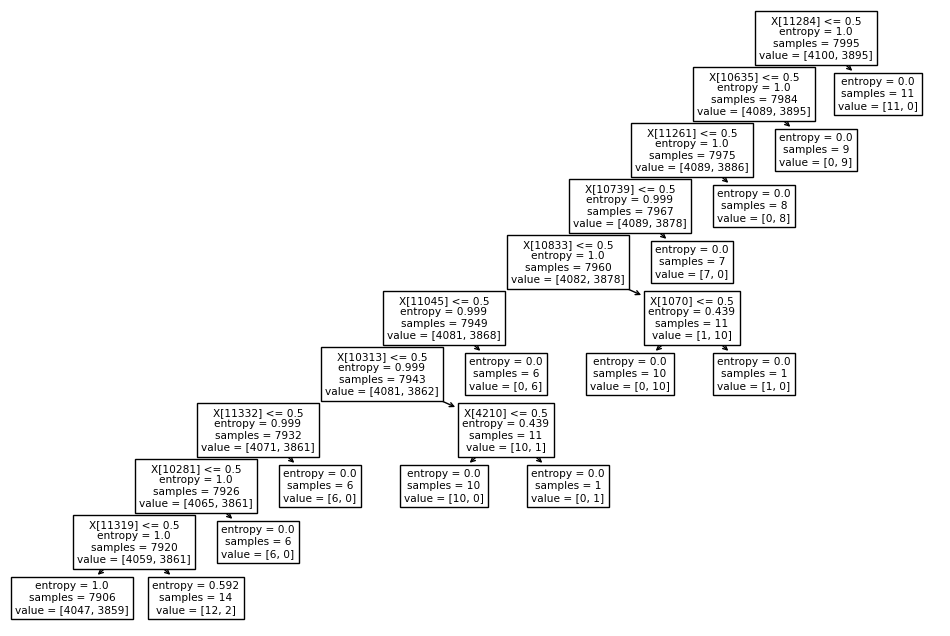

In [28]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion=best_Criterion, max_depth=best_maxDepth, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [29]:
import joblib
joblib.dump(clf_gini, 'model/decisiontree_model.pkl')

['model/decisiontree_model.pkl']

In [30]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.5113
Training-set accuracy score: 0.5171


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [32]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1021    3]
 [ 974    1]]


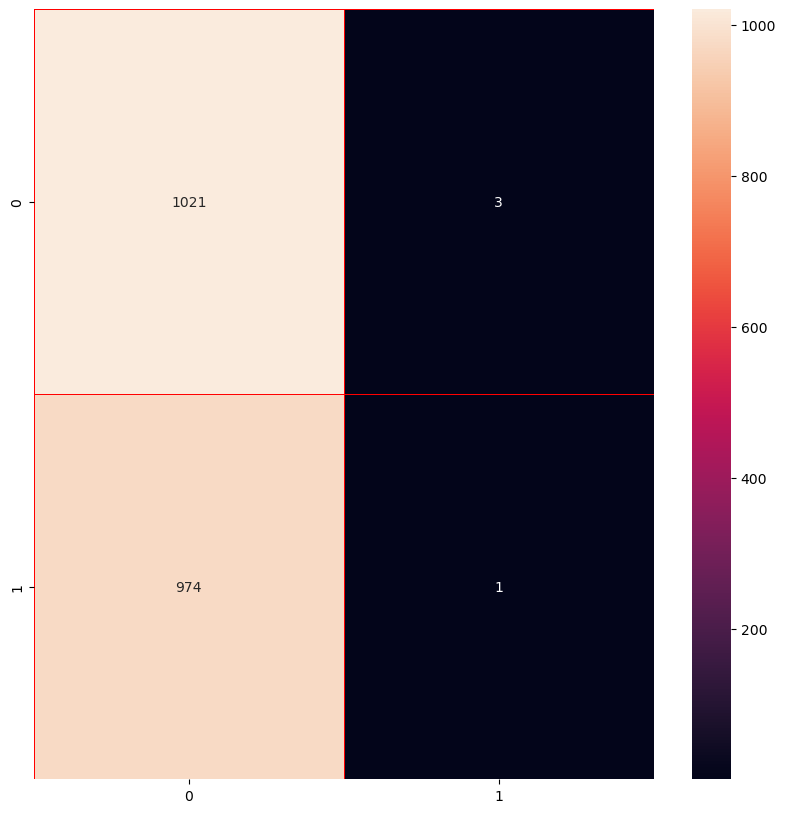

In [33]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [34]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1024
           1       0.25      0.00      0.00       975

    accuracy                           0.51      1999
   macro avg       0.38      0.50      0.34      1999
weighted avg       0.38      0.51      0.35      1999

